In [1]:
"""
convergence_tests.ipynb

Created by Chris Stevens 2023
Copyright (c) 2023 University of Canterbury. All rights reserved.
"""

################################################################################
# Import required libraries and open simulation files
################################################################################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

files = [
    h5py.File('100_order2.hdf','r'),
    h5py.File('200_order2.hdf','r'),
    h5py.File('400_order2.hdf','r'),
    h5py.File('800_order2.hdf','r')
    ]

intervals = []
for i in range(len(files)):
    intervals.append(list(files[i].get("Constraints").keys())[0])


iterations = []
for i in range(0,len(files)):
    iterations.append(len(files[i].get('Constraints/' + intervals[i])))

keys = []
for i in range(0,len(files)):
    keys.append(sorted(map(int,list(files[i].get('Constraints/' + intervals[i]).keys()))))

start = keys[0][0]
end   = keys[0][-1]

In [15]:
################################################################################
# Read in the times, constraints and spatial grid
################################################################################

C1 = []
C2 = []
C3 = []
C4 = []
t  = []
for j in range(0,len(files)):
    temp_C1 = []
    temp_C2 = []
    temp_C3 = []
    temp_C4 = []

    i = start
    while(i < end):
        data  = files[j].get('Constraints').get(intervals[j]).get(str(i*2**j))[()]
        data2 = files[j].get('Time').get(intervals[j]).get(str(i*2**j))
        temp_C1.append(data[0])
        temp_C2.append(data[1])
        temp_C3.append(data[2])
        temp_C4.append(data[3])
        if j == 0:
            t.append(data2[0])

        i += 1

    C1.append(np.array(temp_C1))
    C2.append(np.array(temp_C2))
    C3.append(np.array(temp_C3))
    C4.append(np.array(temp_C4))

zs  = []
for i in range(0,len(files)):
    zs.append(np.linspace(-1.,1.,\
        len(files[i].get('Constraints').get(intervals[i]).get(str(start))[0])))

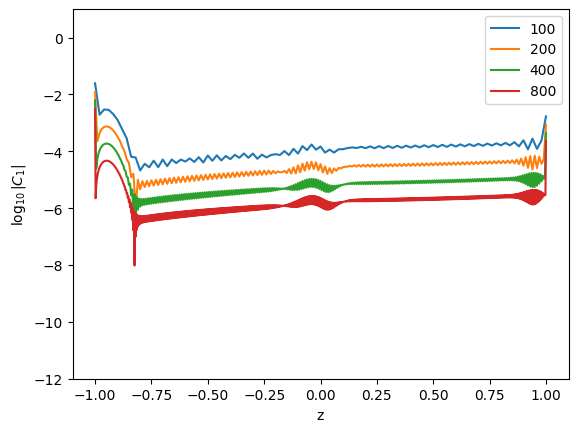

In [16]:
################################################################################
# Semi-log_10 plot of constraints on a timeslice
################################################################################
tslice = 200

constraints_tslice_log10 = []
for i in range(0,len(files)):
    constraints_tslice_log10.append(np.log10(np.abs(C1[i][tslice])))

fig = plt.figure()
ax = plt.gca()

labels = ['100', '200', '400', '800']

for i in range(0,len(files)):
    ax.plot(zs[i], constraints_tslice_log10[i], label=labels[i])

plt.ylim(-12.,1.)
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$\log_{10}|C_1|$');

In [19]:
################################################################################
# Calculate the order of convergence
################################################################################

constraints_tslice_log2 = []
for i in range(0,len(files)):
    constraints_tslice_log2.append(np.log2(np.abs(C1[i][tslice])))
    
diffs = []
for i in range(0,len(files)-1):
    constraint_coarse = constraints_tslice_log2[i]
    constraint_fine   = constraints_tslice_log2[i+1][::2]
    diffs.append(np.average(constraint_coarse - constraint_fine))
print(diffs)

[2.261852863596405, 2.1677910494293093, 2.159839506536443]


/tmp/ipykernel_33988/2812671877.py:9: RuntimeWarning: divide by zero encountered in log10
  temp_constraints_overtime.append(np.log10(np.sqrt(np.abs(np.sum(C1[i][j]**2.)))))


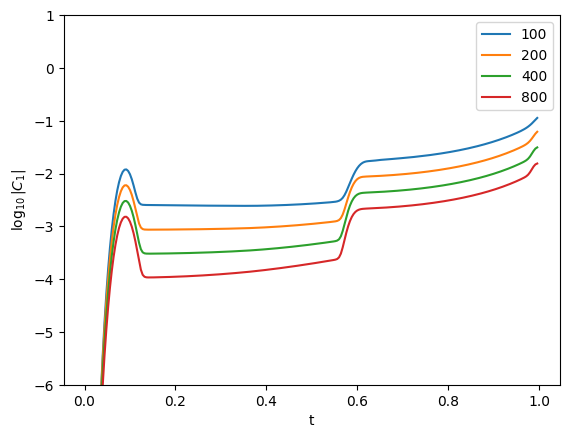

In [21]:
################################################################################
# Semi-log_10 plot of L2-Norm of constraints overtime 
################################################################################

constraints_overtime = []
for i in range(0,len(files)):
    temp_constraints_overtime = []
    for j in range(0,len(t)):
        temp_constraints_overtime.append(np.log10(np.sqrt(np.abs(np.sum(C1[i][j]**2.)))))
    constraints_overtime.append(temp_constraints_overtime)

fig = plt.figure()
ax = plt.gca()

labels = ['100', '200', '400', '800']

for i in range(0,len(files)):
    ax.plot(t, constraints_overtime[i], label=labels[i])

plt.ylim(-6.,1.)
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$\log_{10}|C_1|$');